# Regression Workbook 

The purpose of this problem set is to put your regression skills to the test. As a GA student of data science, you have covered a number of sklearn regression techniques, so now is your chance to apply them. We'll be using the Boston Housing Dataset. Just kidding. I know you hate that one. 

We'll be exploring the relationships between sugar, economics, and teeth. You are given a dataset containing sugar consuption, healthcare spending, per capita GDP, literacy rate and the number of bad teeth per child across several hundred countries. What do you think? If you get richer, do your teeth get worse from more sugary foods, or better with health care assistance? Does education improve health, or drive excess? 

<img src='https://raw.githubusercontent.com/momonala/DS_tutorials/master/files/brush.gif' width='150'>

You'll be implementing some of the techniques you've learned in class with hypothesis testing, exploratory analysis, and regression. A few questions to consider: 
 
    1) What questions are relevant to ask? How do explore these your initial analysis?
    2) How can you optimize on the default regression techniques? 
    3) How can you effectively visualize and explain the relationships?
    
I've provided some imports and starter code to get you going.

If you get stuck, remember the options you have. Talk to your neighbors, check out StackOverflow and blogs (I recommend Googling your question with the term blog.yhat), and run '?' on functions for docstrings. 

In [1]:
# ex. 
max?

# Exploratory Analysis 

In [49]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [76]:
df = pd.read_csv("data/dental_economics.csv")

In [4]:
#TO DO: 
# perform exploratory analysis. Clean the data as necessary and use correlation to find relevant features. 
# check the distributions of the data. Write a sentence about the distribution. 

In [51]:
df

Country  badteeth  literacy_avg       GDP_avg   sugar_avg  \
0              Saudi Arabia      5.90     80.046624  10460.159370   63.511591   
1                 Guatemala      5.20     69.723543   1487.355625   97.758182   
2                 Mauritius      4.90     84.339633   3074.829677  120.550000   
3                    Brunei      4.80     88.439129  20991.519650  108.220000   
4    Bosnia and Herzegovina      4.80     97.332859   1590.190034   45.101538   
5                   Bolivia      4.70     83.755499   1003.185864   75.776591   
6                     Gabon      4.40     81.674407   4279.960699   38.482045   
7                  Bulgaria      4.40     98.278002   1764.217503   88.168636   
8                   Ukraine      4.40     99.574575    966.073658  114.437692   
9                     India      3.94     55.101834    341.579042   56.663636   
10                 Paraguay      3.80     90.700982   1179.063372   59.774091   
11                 Honduras      3.70     83.369675   1060.410593   89.974091   
12                Lithuania      3.60     99.263524   4027.049235   94.203846   
13                   Panama      3.60     90.711334   3402.295409   89.725000   
14                  Croatia      3.50     97.909642   5472.736277  132.983077   
15                  Lebanon      3.40     89.612439   4830.489833   85.926591   
16                   Latvia      3.40     99.661037   3357.717289   97.365385   
17                    Chile      3.40     95.667770   3464.026061  105.604546   
18                Argentina      3.40     96.273284   7082.771079  111.458182   
19                  Hungary      3.30     98.979546   3718.550575  114.571591   
20                   Jordan      3.30     88.079159   1891.887731   97.010909   
21                   Poland      3.20     99.373388   4566.766426  116.689091   
22               Madagascar      3.10     67.583538    315.443682   25.656364   
23               Mozambique      3.05     41.138077    233.693024   20.176364   
24           Macedonia, FYR      3.03     95.854293   1855.310024   91.463846   
25                  Albania      3.02     97.165639   1201.566009   49.504318   
26                  Ecuador      3.00     87.810872   1251.430258  100.747273   
27                   Russia      2.90     99.037096   2226.695890  107.060769   
28                     Peru      2.90     87.156296   2145.711572   90.347727   
29              Philippines      2.90     91.500396    989.510400   63.200000   
..                      ...       ...           ...           ...         ...   
91                     Iran      1.15     69.277636   1585.797414   71.790455   
92                   Cyprus      1.14     96.614842  10756.220300   90.161136   
93                    Libya      1.14     78.257986   6924.944874   93.399091   
94                    Spain      1.12     96.864720  10286.623690   78.454091   
95                  Jamaica      1.10     83.481432   3169.910541  133.751364   
96                    Italy      1.10     97.952272  14161.119320   82.003182   
97             South Africa      1.05     85.075746   3131.496486  103.487273   
98                    China      1.03     82.333708    601.806937   13.886818   
99               Bangladesh      1.00     42.441705    316.041344   24.037273   
100                 Burundi      1.00     51.536191    145.877232    4.234545   
101                  Uganda      0.90     67.208729    247.699035   18.183636   
102               Swaziland      0.90     73.017355   1190.583135  115.070000   
103                   Benin      0.80     26.772001    311.400781    8.469091   
104        Congo, Dem. Rep.      0.75     64.189267    218.595696    6.102727   
105     Antigua and Barbuda      0.70     98.950000   8806.493107   98.443182   
106            Burkina Faso      0.70     18.201399    177.987804    8.220000   
107                  Malawi      0.70     57.993543    141.504295   24.037273   
108                   Haiti      0.65     47.387873

In [6]:
df.shape

(121, 6)

In [7]:
df.columns

Index([u'Country', u'badteeth', u'literacy_avg', u'GDP_avg', u'sugar_avg',
       u'health_avg'],
      dtype='object')

In [8]:
df.describe()

badteeth  literacy_avg       GDP_avg   sugar_avg   health_avg
count  121.000000    121.000000    121.000000  121.000000   121.000000
mean     2.078099     78.165821   3038.871018   69.238413   170.912344
std      1.217042     20.786888   4993.960158   39.086482   279.593892
min      0.300000     18.201399    139.937213    2.677727     2.155842
25%      1.180000     66.641822    447.218705   36.740682    16.922464
50%      1.900000     83.755499   1277.797569   70.110682    66.530291
75%      2.800000     96.273284   3240.432619   98.567727   180.832570
max      5.900000     99.763509  38226.277040  156.538636  1705.243078

In [9]:
df.corr()

badteeth  literacy_avg   GDP_avg  sugar_avg  health_avg
badteeth      1.000000      0.386415  0.130030   0.341168    0.042692
literacy_avg  0.386415      1.000000  0.270349   0.594290    0.380230
GDP_avg       0.130030      0.270349  1.000000   0.381424    0.704342
sugar_avg     0.341168      0.594290  0.381424   1.000000    0.370900
health_avg    0.042692      0.380230  0.704342   0.370900    1.000000

In [10]:
df.isnull().sum()

Country         0
badteeth        0
literacy_avg    0
GDP_avg         0
sugar_avg       0
health_avg      0
dtype: int64

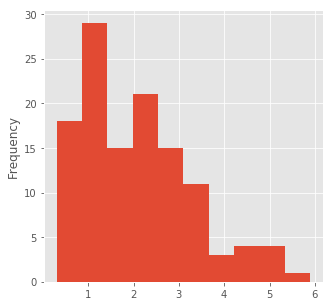

In [11]:
df.badteeth.plot(kind = 'hist', figsize = (5, 5))

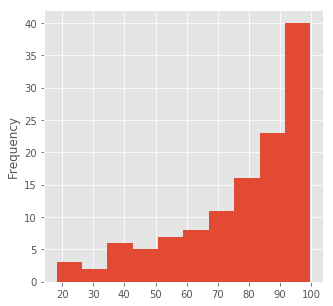

In [12]:
df.literacy_avg.plot(kind = 'hist', figsize = (5, 5))

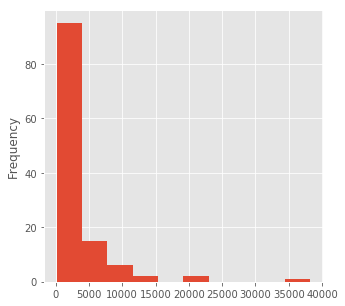

In [13]:
df.GDP_avg.plot(kind = 'hist', figsize = (5, 5))

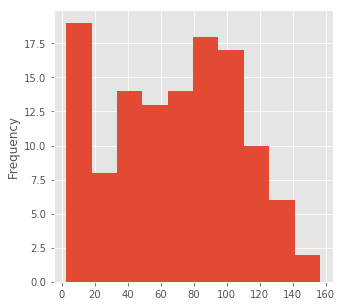

In [14]:
df.sugar_avg.plot(kind = 'hist', figsize = (5, 5))

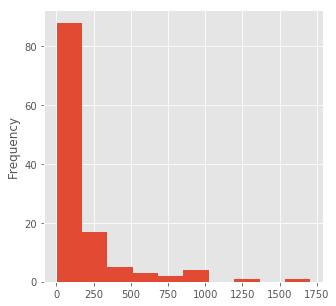

In [15]:
df.health_avg.plot(kind = 'hist', figsize = (5, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116d7e390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117fc3650>]], dtype=object)

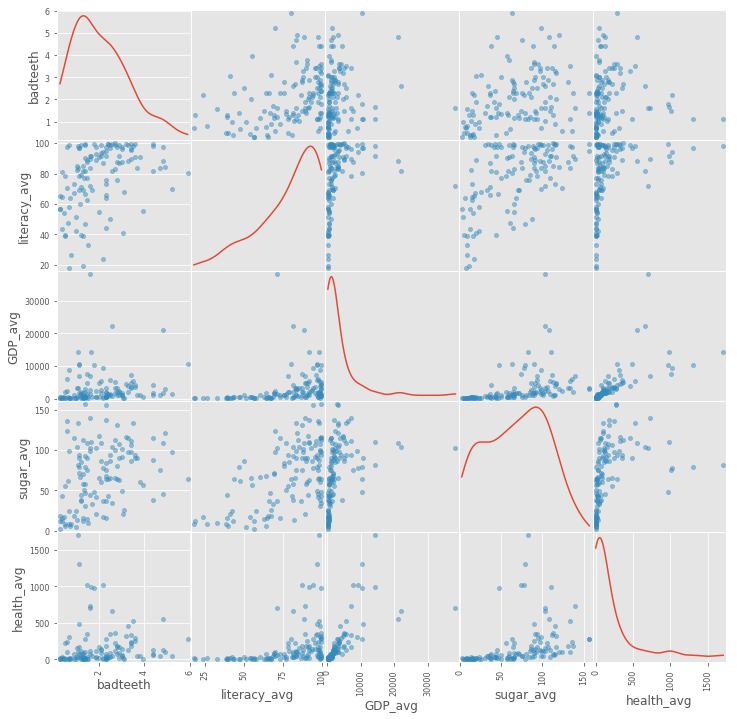

In [16]:
pd.tools.plotting.scatter_matrix(
    df[ ['badteeth', 'literacy_avg', 'GDP_avg', 'sugar_avg', 'health_avg'] ],
    diagonal = 'kde', s = 75, figsize = (12, 12))

### Exercises:
##### --Double click this cell to answer-- 

1)  Describe the features of the data set. Did you find anything unique to them?

Answer: The features of the data set include: the average literacy rate, the average GDP, the average amount of sugar, and the average number of dollars spent on health per person. We did not find anything particularly unique to them. They are all continous variables. 

2)  Describe the correlations you found. 

Answer: 
-The highest correlations are between health & GDP(.704342) and literacy & sugar(.594290).
-The best predictator of bad teeth is the average literacy rate. 

3)  Describe the distributions of the data. 

Answer: See graphs above. 

4)  Describe any assumptions you are making. How will these affect your research?

Answer: We are not making any assumptions at this time. 

1) In your own words, explain the difference between correlation and regression. Explain a few advantages and disadvantages to each. Compare results with your table: 

Answer:  Correlation is measuring a linear relationship whereas regression can express non-linear relationships in additional to linear. 

Advantage of correlation: 
-Quick and easy
-Gives you surface level information. 

Advantage of regression: 
-Gives you statistical significance. 
-Allows you to look a non-linear relationships across multiple variables.


# Hypothesis
You've seen the data. What are the features and what is the output? Explain your hypotheses here: 


### H0: Bad teeth are not positively related to literacy, sugar, and GDP. 

### H1: Bad teeth are positively related to literacy, sugar, and GDP. 



# Build your models 

In [48]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import  train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [72]:
X = df[['literacy_avg', 
        'GDP_avg', 
        'sugar_avg', 
        'health_avg'
       ] ]


In [53]:
X

literacy_avg       GDP_avg   sugar_avg   health_avg
0       80.046624  10460.159370   63.511591   282.826662
1       69.723543   1487.355625   97.758182    44.111681
2       84.339633   3074.829677  120.550000   100.265111
3       88.439129  20991.519650  108.220000   549.706067
4       97.332859   1590.190034   45.101538   132.698130
5       83.755499   1003.185864   75.776591    39.160258
6       81.674407   4279.960699   38.482045    73.898363
7       98.278002   1764.217503   88.168636   130.622897
8       99.574575    966.073658  114.437692    61.854231
9       55.101834    341.579042   56.663636     7.254130
10      90.700982   1179.063372   59.774091    44.132156
11      83.369675   1060.410593   89.974091    45.757770
12      99.263524   4027.049235   94.203846   292.363316
13      90.711334   3402.295409   89.725000   245.019140
14      97.909642   5472.736277  132.983077   525.153033
15      89.612439   4830.489833   85.926591   180.263118
16      99.661037   3357.717289   97.365385   241.645727
17      95.667770   3464.026061  105.604546   215.775999
18      96.273284   7082.771079  111.458182   325.732128
19      98.979546   3718.550575  114.571591   459.915086
20      88.079159   1891.887731   97.010909   122.861474
21      99.373388   4566.766426  116.689091   324.620248
22      67.583538    315.443682   25.656364     7.480398
23      41.138077    233.693024   20.176364    10.393336
24      95.854293   1855.310024   91.463846   139.200958
25      97.165639   1201.566009   49.504318    52.022592
26      87.810872   1251.430258  100.747273    49.566965
27      99.037096   2226.695890  107.060769   162.019711
28      87.156296   2145.711572   90.347727    80.703005
29      91.500396    989.510400   63.200000    16.922464
..            ...           ...         ...          ...
91      69.277636   1585.797414   71.790455    78.166642
92      96.614842  10756.220300   90.161136   485.693231
93      78.257986   6924.944874   93.399091   161.446500
94      96.864720  10286.623690   78.454091  1299.385716
95      83.481432   3169.910541  133.751364    99.004910
96      97.952272  14161.119320   82.003182  1705.243078
97      85.075746   3131.496486  103.487273   147.265819
98      82.333708    601.806937   13.886818    36.797123
99      42.441705    316.041344   24.037273    34.059621
100     51.536191    145.877232    4.234545     3.940396
101     67.208729    247.699035   18.183636     6.102906
102     73.017355   1190.583135  115.070000    69.090985
103     26.772001    311.400781    8.469091    11.187499
104     64.189267    218.595696    6.102727     2.155842
105     98.950000   8806.493107   98.443182   311.499689
106     18.201399    177.987804    8.220000    10.479612
107     57.993543    141.504295   24.037273     8.583817
108     47.387873    411.367494   61.144773     7.299736
109     97.282913   6049.909228  136.116136   242.717012
110     70.298423   2228.839366  123.600000    96.792424
111     39.881833    179.641216    5.915909     4.749426
112     78.286823   1896.809581   55.977727   220.663475
113     38.863732    168.925599    8.469091     4.144188
114     53.765864    369.247651   16.751364    14.655615
115     64.697274    263.170394   15.256818    19.074719
116     81.027319    295.950973   43.652045    27.418767
117     43.321710    447.218705   12.143182     4.275780
118     56.892323    274.684342   12.392273     7.739916
119     65.448468    340.232535   17.810000     8.313740
120     56.709445    237.139569    2.677727    10.645498

[121 rows x 4 columns]

In [73]:
c = df.badteeth

In [21]:
c

0      5.90
1      5.20
2      4.90
3      4.80
4      4.80
5      4.70
6      4.40
7      4.40
8      4.40
9      3.94
10     3.80
11     3.70
12     3.60
13     3.60
14     3.50
15     3.40
16     3.40
17     3.40
18     3.40
19     3.30
20     3.30
21     3.20
22     3.10
23     3.05
24     3.03
25     3.02
26     3.00
27     2.90
28     2.90
29     2.90
       ... 
91     1.15
92     1.14
93     1.14
94     1.12
95     1.10
96     1.10
97     1.05
98     1.03
99     1.00
100    1.00
101    0.90
102    0.90
103    0.80
104    0.75
105    0.70
106    0.70
107    0.70
108    0.65
109    0.60
110    0.60
111    0.50
112    0.50
113    0.50
114    0.46
115    0.40
116    0.40
117    0.40
118    0.30
119    0.30
120    0.30
Name: badteeth, dtype: float64

In [74]:
model = linear_model.LinearRegression().fit(X, c)

print model.coef_
print model.intercept_

[ 0.41122276  0.18764188  0.21683046 -0.31698827]
2.07809917355


In [75]:
model.score(X,c)


0.20027629280569492

In [61]:
model = smf.ols(formula = 'badteeth ~ literacy_avg + GDP_avg + sugar_avg + health_avg', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               badteeth   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     7.263
Date:                Wed, 14 Jun 2017   Prob (F-statistic):           2.96e-05
Time:                        20:28:32   Log-Likelihood:                -181.44
No. Observations:                 121   AIC:                             372.9
Df Residuals:                     116   BIC:                             386.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.2273      0.407      0.559      0.577        -0.578     1.033
literacy_avg     0.0198      0.006      3.177      0.002         0.007     0.032
GDP_avg       3.757e-05   2.92e-05      1.288      0.200     -2.02e-05  9.53e-05
sugar_avg        0.0055      0.003      1.654      0.101        -0.001     0.012
health_avg      -0.0011      0.001     -2.139      0.035        -0.002  -8.4e-05
==============================================================================
Omnibus:                       12.970   Durbin-Watson:                   0.374
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.736
Skew:                           0.763   Prob(JB):                      0.00104
Kurtosis:                       3.628   Cond. No.                     2.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
model = smf.ols(formula = 'badteeth ~ literacy_avg + sugar_avg + health_avg', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               badteeth   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     9.079
Date:                Wed, 14 Jun 2017   Prob (F-statistic):           1.88e-05
Time:                        20:33:09   Log-Likelihood:                -182.29
No. Observations:                 121   AIC:                             372.6
Df Residuals:                     117   BIC:                             383.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.2703      0.406      0.665      0.507        -0.535     1.075
literacy_avg     0.0189      0.006      3.045      0.003         0.007     0.031
sugar_avg        0.0065      0.003      1.967      0.052     -4.47e-05     0.013
health_avg      -0.0007      0.000     -1.711      0.090        -0.001     0.000
==============================================================================
Omnibus:                       16.624   Durbin-Watson:                   0.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.035
Skew:                           0.859   Prob(JB):                     7.36e-05
Kurtosis:                       3.906   Cond. No.                     1.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
model = smf.ols(formula = 'badteeth ~ literacy_avg + sugar_avg', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               badteeth   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     11.96
Date:                Wed, 14 Jun 2017   Prob (F-statistic):           1.86e-05
Time:                        20:33:41   Log-Likelihood:                -183.79
No. Observations:                 121   AIC:                             373.6
Df Residuals:                     118   BIC:                             382.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.4069      0.402      1.013      0.313        -0.389     1.202
literacy_avg     0.0166      0.006      2.721      0.008         0.005     0.029
sugar_avg        0.0054      0.003      1.652      0.101        -0.001     0.012
==============================================================================
Omnibus:                       16.086   Durbin-Watson:                   0.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.044
Skew:                           0.869   Prob(JB):                     0.000121
Kurtosis:                       3.747   Cond. No.                         438.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
model = smf.ols(formula = 'badteeth ~ literacy_avg', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               badteeth   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     20.89
Date:                Wed, 14 Jun 2017   Prob (F-statistic):           1.20e-05
Time:                        20:34:12   Log-Likelihood:                -185.17
No. Observations:                 121   AIC:                             374.3
Df Residuals:                     119   BIC:                             379.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.3097      0.400      0.774      0.441        -0.483     1.102
literacy_avg     0.0226      0.005      4.570      0.000         0.013     0.032
==============================================================================
Omnibus:                       16.390   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.452
Skew:                           0.894   Prob(JB):                     9.84e-05
Kurtosis:                       3.681   Cond. No.                         316.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Will taking the log help improve our model?
Findings: Taking the log did not help

In [79]:
#LOG

df['Log_GDP_avg'] = np.log10(df.GDP_avg)

In [81]:
df['Log_Health_avg'] = np.log10(df.health_avg)

In [84]:
model = smf.ols(formula = 'badteeth ~ literacy_avg + Log_GDP_avg + sugar_avg + Log_Health_avg', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               badteeth   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     6.496
Date:                Wed, 14 Jun 2017   Prob (F-statistic):           9.41e-05
Time:                        20:49:01   Log-Likelihood:                -182.73
No. Observations:                 121   AIC:                             375.5
Df Residuals:                     116   BIC:                             389.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -0.9851      1.063     -0.927      0.356        -3.090     1.120
literacy_avg       0.0174      0.007      2.542      0.012         0.004     0.031
Log_GDP_avg        0.7756      0.545      1.423      0.157        -0.304     1.855
sugar_avg          0.0045      0.004      1.106      0.271        -0.004     0.012
Log_Health_avg    -0.5829      0.452     -1.290      0.200        -1.478     0.312
==============================================================================
Omnibus:                       12.086   Durbin-Watson:                   0.318
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.653
Skew:                           0.762   Prob(JB):                      0.00179
Kurtosis:                       3.430   Cond. No.                     1.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
df['literacy_avg'] =(df.literacy_avg-df.literacy_avg.mean())/df.literacy_avg.std()

In [68]:
df['GDP_avg'] =(df.GDP_avg-df.GDP_avg.mean())/df.GDP_avg.std()

In [69]:
df['sugar_avg'] =(df.sugar_avg-df.sugar_avg.mean())/df.sugar_avg.std()

In [70]:
df['health_avg'] =(df.health_avg-df.health_avg.mean())/df.health_avg.std()

In [82]:
df.head()

Country  badteeth  literacy_avg       GDP_avg   sugar_avg  \
0            Saudi Arabia       5.9     80.046624  10460.159370   63.511591   
1               Guatemala       5.2     69.723543   1487.355625   97.758182   
2               Mauritius       4.9     84.339633   3074.829677  120.550000   
3                  Brunei       4.8     88.439129  20991.519650  108.220000   
4  Bosnia and Herzegovina       4.8     97.332859   1590.190034   45.101538   

   health_avg  Log_GDP_avg  Log_Health_avg  
0  282.826662     4.019538        2.451520  
1   44.111681     3.172415        1.644554  
2  100.265111     3.487821        2.001150  
3  549.706067     4.322044        2.740131  
4  132.698130     3.201449        2.122865

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bc57850>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c7cb310>]], dtype=object)

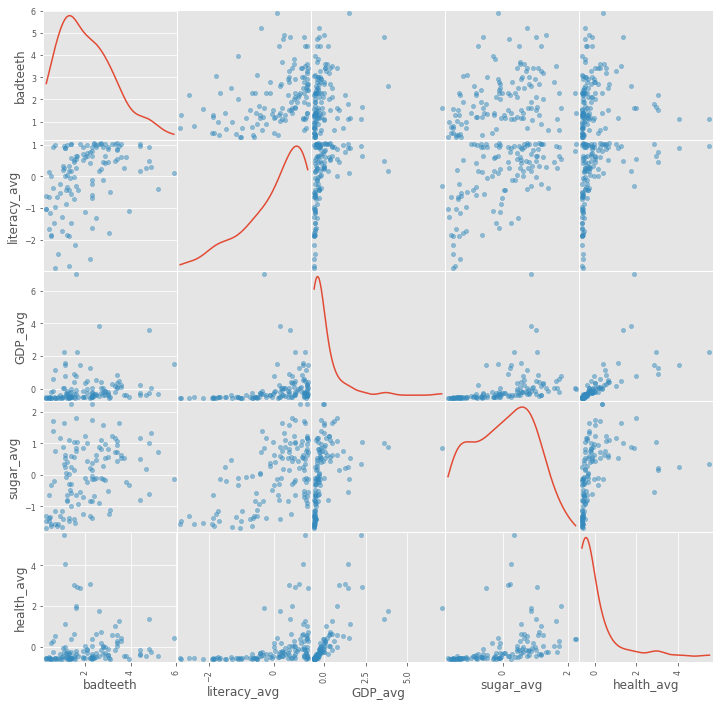

In [71]:
pd.tools.plotting.scatter_matrix(
    df[ ['badteeth', 'literacy_avg', 'GDP_avg', 'sugar_avg', 'health_avg'] ],
    diagonal = 'kde', s = 75, figsize = (12, 12))

In [83]:
X = df[['literacy_avg', 
        'Log_GDP_avg', 
        'sugar_avg', 
        'Log_Health_avg'
       ] ]

c = df.badteeth

In [46]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.1)
clf.fit(X, c)
print clf.coef_
print clf.intercept_


[ 0.28508779  0.          0.14908534 -0.01083555]
2.0771970207


In [47]:
clf.score(X,c)

0.16216555824764023

# Spot Check 

How's the model building coming? Have you identifyed some features of interest and noticed any trends? If so, put them into words. 

### Noticeable Trends: 

1) Literacy appears to impact bad teeth more than the other variables.

2) 

3) 


# Optimization

Time to fine tune the model. What hyperparameters exist in your model? How do you tune these hyperparameters? Also, how can you test for overfitting, and how will you reduce it if you see it? Implement below. 

In [98]:
X = df[['literacy_avg', 
        'Log_GDP_avg', 
        'sugar_avg', 
        'Log_Health_avg'
       ] ]

c = df.badteeth

In [99]:
from sklearn import decomposition, cluster

pca = decomposition.PCA().fit(X)
X = pca.transform(X)

X_columns = ['PC0', 'PC1', 'PC2', 'PC3']
X = pd.DataFrame(X, columns = X_columns)

In [100]:
pca.components_


array([[  3.53392852e-01,   1.04129437e-02,   9.35328961e-01,
          1.28373731e-02],
       [ -9.35354634e-01,  -5.04887961e-03,   3.53574593e-01,
         -8.43950441e-03],
       [ -1.49578863e-02,   6.24858177e-01,  -1.20173808e-02,
          7.80502468e-01],
       [  1.20950709e-03,   7.80652508e-01,  -5.70309607e-04,
         -6.24963898e-01]])

In [101]:
normalized_var = pca.explained_variance_ratio_

cumulated_normalized_var = np.cumsum(normalized_var)


In [102]:
pca.explained_variance_ratio_

array([  8.72493745e-01,   1.27356317e-01,   1.38443918e-04,
         1.14935804e-05])

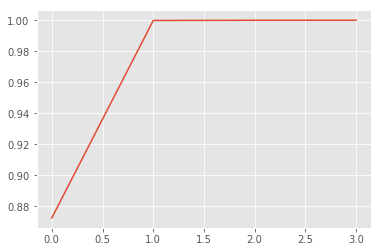

In [103]:
plt.plot(cumulated_normalized_var)


In [93]:
pca = decomposition.PCA(n_components = 3).fit(X)

X = pca.transform(X)

X = pd.DataFrame({'PC0': X.T[0], 'PC1': X.T[1], 'PC2': X.T[2]})

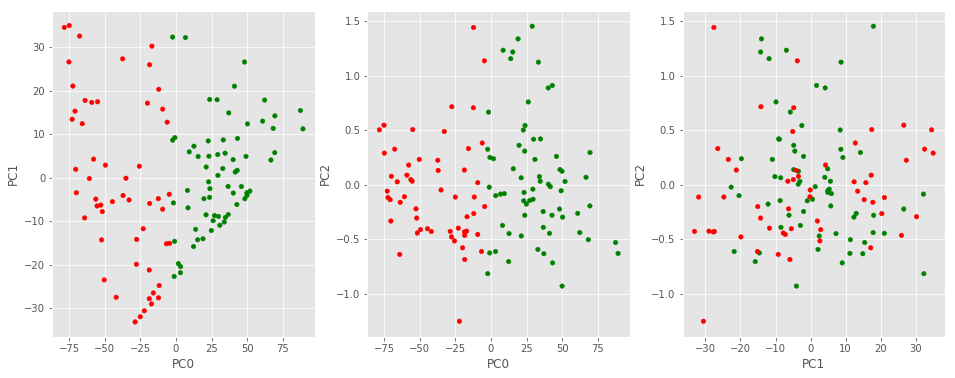

In [96]:

model = cluster.KMeans(n_clusters = 2, random_state = 0).fit(X)

cluster_ = pd.Series(model.labels_)

color = cluster_.map({0: 'red', 1: 'green', 2: 'blue', 3: 'purple'})

_, axes = plt.subplots(1, 3, figsize = (16, 6))

X.plot(kind = 'scatter', x = 'PC0', y = 'PC1', c = color, ax = axes[0])
X.plot(kind = 'scatter', x = 'PC0', y = 'PC2', c = color, ax = axes[1])
X.plot(kind = 'scatter', x = 'PC1', y = 'PC2', c = color, ax = axes[2])

Evaluate your models again. How do different hyperparameters change your predictive performance? Again, explain in a few words.

In [ ]:
# TO DO:
# fill in the correct values for the hyperparameter testing. 

for INPUT HYPERPARAMTER in range(INPUT RANGE):
    model = 
    #TO DO: test hyperparameters 

# Final Conclusions

If a data scientist makes a brilliant conclusion but can't communicate effectively, did they ever make a conclusion?  

Explain your findings to a person with a math/stats background. Reference your H1/H0 hypotheses:

Answer: 

Now explain them to a person who hates math:

Answer: 
